<a href="https://colab.research.google.com/github/g4orge/attendance/blob/master/Assignment_II.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**IAI5101: Foundations of Machine Learning for Scientists & Engineers**

**Assignment II**

**Dima AlQaruoti** 300379269

**Amal Hussein** 5135472

**Abdoul Karim A. Kouassi** 300157716


In [ ]:
import nltk
nltk.download('stopwords', download_dir='/root/nltk_data')
nltk.data.path.append('/root/nltk_data')
from nltk.corpus import stopwords
stop_words = set(stopwords.words('english'))




[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Bidirectional, LSTM, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from wordcloud import WordCloud
import re
import nltk
from google.colab import drive
from nltk.corpus import stopwords
from collections import Counter
!pip install swifter
nltk.download('stopwords')
stop_words = set(stopwords.words('english'))
nltk.download('punkt')# check the prof's library.
import string
from nltk.tokenize import word_tokenize

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.2/1.2 MB 6.7 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for swifter: filename=swifter-1.4.0-py3-none-any.whl size=16507 sha256=f3d5503f1fa6ae48067d9d1f803cabac4bc98518710246e9b4ecdeecb272b9f4
  Stored in directory: /root/.cache/pip/wheels/ef/7f/bd/9bed48f078f3ee1fa75e0b29b6e0335ce1cb03a38d3443b3a3
Successfully built swifter


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


In [ ]:
# Mount Google Drive
drive.mount('/content/drive')

# Load Dataset from Google Drive
file_path = '/content/drive/My Drive/complaints.csv'
df = pd.read_csv(file_path)
print(df.head())


Mounted at /content/drive
   complaint_no           product  \
0             0       credit_card   
1             1       credit_card   
2             2    retail_banking   
3             3  credit_reporting   
4             4  credit_reporting   

                                           narrative  
0  purchase order day shipping amount receive pro...  
1  forwarded message date tue subject please inve...  
2  forwarded message cc sent friday pdt subject f...  
3  payment history missing credit report speciali...  
4  payment history missing credit report made mis...  


In [ ]:
# Drop irrelevant columns and handle missing values
df.dropna(inplace=True)
df.drop(columns=['complaint_no'], inplace=True)
# Drop any completely empty rows
df.dropna(subset=['narrative'], inplace=True)
# Step 3: Inspect the Dataset
print("Dataset Overview:")
print(df.head())  # Display first few rows
print("\nDataset Info:")
print(df.info())  # Show data types and missing values
print("\nMissing Values Count:")
print(df.isnull().sum())  # Check for missing values


Dataset Overview:
            product                                          narrative
0       credit_card  purchase order day shipping amount receive pro...
1       credit_card  forwarded message date tue subject please inve...
2    retail_banking  forwarded message cc sent friday pdt subject f...
3  credit_reporting  payment history missing credit report speciali...
4  credit_reporting  payment history missing credit report made mis...

Dataset Info:
<class 'pandas.core.frame.DataFrame'>
Index: 162411 entries, 0 to 162420
Data columns (total 2 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   product    162411 non-null  object
 1   narrative  162411 non-null  object
dtypes: object(2)
memory usage: 3.7+ MB
None

Missing Values Count:
product      0
narrative    0
dtype: int64


In [ ]:
# Function to clean text
def clean_text(text):
    text = str(text).lower()  # Convert to lowercase
    text = re.sub(r'\W', ' ', text)  # Remove special characters
    text = re.sub(r'\s+', ' ', text).strip()  # Remove extra spaces
    return text

# Apply text cleaning
df["clean_narrative"] = df["narrative"].apply(clean_text)

In [ ]:
# Remove complaint number column if it exists
if 'complaint_no' in df.columns:
    df.drop(columns=['complaint_no'], inplace=True)

In [ ]:
!pip install --upgrade nltk


In [ ]:
import shutil
import os

nltk_data_path = "/root/nltk_data"
if os.path.exists(nltk_data_path):
    shutil.rmtree(nltk_data_path)

print("Deleted old NLTK data folder.")

Deleted old NLTK data folder.


In [ ]:
import nltk

nltk.download('punkt')
nltk.download('stopwords')

print("Downloaded required NLTK resources!")


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


Downloaded required NLTK resources!


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import nltk
nltk.download('punkt')  # Ensure 'punkt' is downloaded
nltk.download('stopwords')  # Ensure stopwords are downloaded
# Load English NLP model for lemmatization

# Manually set the NLTK data path
nltk.data.path.append('/usr/local/nltk_data')


[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:
import spacy
import string
import re
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

In [ ]:
# Download necessary resources
nltk.download('punkt')  # Ensures the Punkt tokenizer is available
nltk.download('stopwords')

# Load English NLP model for lemmatization
nlp = spacy.load("en_core_web_sm")

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [ ]:

# Function for text preprocessing
def preprocess_text(text):
    if not isinstance(text, str):
        return ""

    # Convert to lowercase
    text = text.lower()

    # Remove punctuation
    text = text.translate(str.maketrans('', '', string.punctuation))

    # Remove extra spaces
    text = re.sub(r'\s+', ' ', text).strip()


In [ ]:

# Apply preprocessing to the 'narrative' column
df['cleaned_narrative'] = df['narrative'].apply(preprocess_text)

In [ ]:


# Display processed text
print("\nProcessed Data:")
print(df[['narrative', 'cleaned_narrative']].head())



Processed Data:
                                           narrative cleaned_narrative
0  purchase order day shipping amount receive pro...              None
1  forwarded message date tue subject please inve...              None
2  forwarded message cc sent friday pdt subject f...              None
3  payment history missing credit report speciali...              None
4  payment history missing credit report made mis...              None


<ipython-input-17-c2588d9d864e>:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df["product"], order=df["product"].value_counts().index, palette="coolwarm")


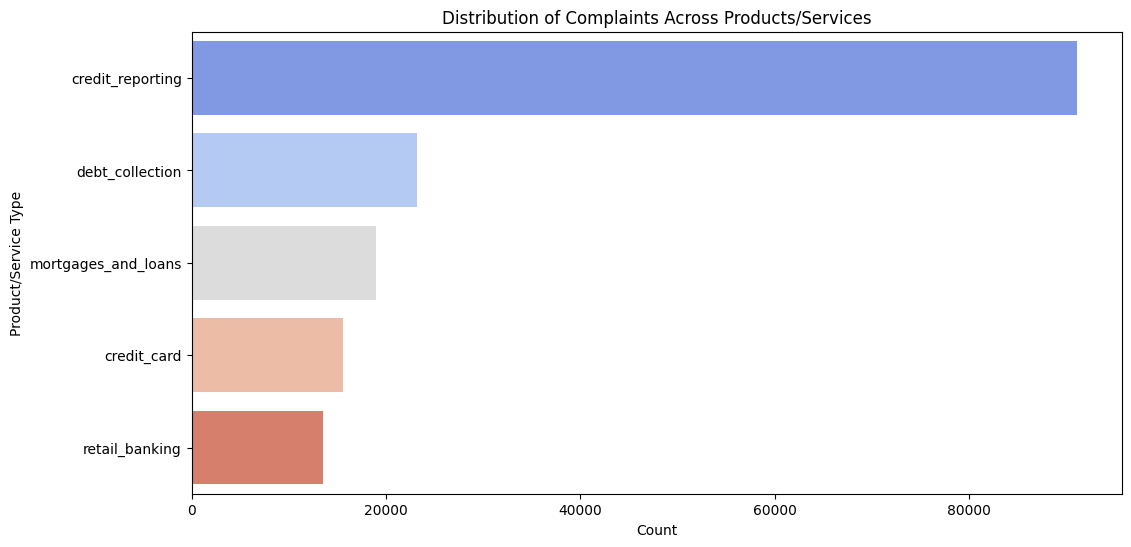

In [ ]:
# Step 5: Explore the Distribution of Products/Services
plt.figure(figsize=(12, 6))
sns.countplot(y=df["product"], order=df["product"].value_counts().index, palette="coolwarm")
plt.xlabel("Count")
plt.ylabel("Product/Service Type")
plt.title("Distribution of Complaints Across Products/Services")
plt.show()

**Analysis of Complaint Distribution Across Financial Products/Services**

This horizontal bar chart illustrates the volume of consumer complaints across different financial products and services, highlighting key areas of concern.

**Key Observations**

1. Credit Reporting (90,000+ complaints) – The highest complaint volume, likely due to credit report errors, fraud, disputes, and delays in corrections.

2. Debt Collection (25,000 complaints) – A major issue, often related to aggressive tactics, harassment, and misinformation about outstanding debts.

3. Mortgages & Loans (~19,000 complaints) – Complaints may stem from loan servicing errors, foreclosures, or unfair lending practices.

4. Credit Cards (15,000 complaints) – Issues include fraudulent charges, billing disputes, and excessive fees.

5. Retail Banking (13,500 complaints) – The lowest volume, with concerns about account closures, overdraft fees, and poor customer service.

**Interpretation & Insights**

**Credit Reporting is the Most Problematic Area**

The overwhelming volume suggests systemic issues such as credit score inaccuracies, identity theft disputes, and slow resolution of errors.

**Debt Collection is a Major Concern**

High complaint volume indicates potential violations of consumer rights, including unethical collection practices and misinformation about debts.

**Mortgages, Credit Cards, and Retail Banking Have Fewer Complaints**

Stricter regulations in lending and improved fraud protection in banking may contribute to the lower complaint volume compared to credit reporting and debt collection.

This distribution highlights the need for stronger consumer protections, particularly in credit reporting and debt collection.

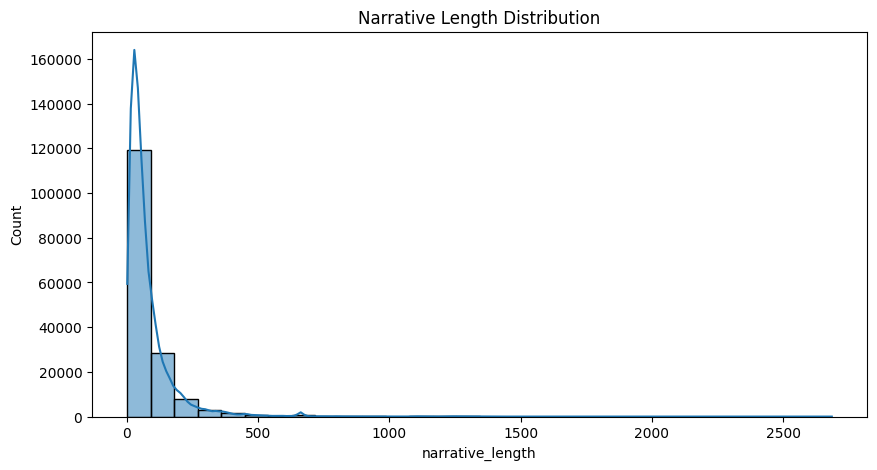

In [ ]:
# Analyzing length distribution
df['narrative_length'] = df['narrative'].apply(lambda x: len(x.split()))
plt.figure(figsize=(10,5))
sns.histplot(df['narrative_length'], bins=30, kde=True)
plt.title("Narrative Length Distribution")
plt.show()




**Analysis of Narrative Length Distribution**

The histogram with KDE (Kernel Density Estimate) plot represents the distribution of narrative lengths in the dataset. The x-axis represents narrative length (number of words or characters), and the y-axis represents the count (number of narratives with that length).

**1. Key ObservationsDetailed Analysis of Narrative Length**

Distribution
The histogram with KDE (Kernel Density Estimate) plot represents the distribution of narrative lengths in the dataset. The x-axis represents narrative length (number of words or characters), and the y-axis represents the count (number of narratives with that length).

**1. Key Observations**

Highly Skewed Distribution (Right-Skewed)

Most narratives have short lengths, clustered toward the left (low word/character count).
A long tail extends to the right, indicating a small number of narratives with very long lengths.
Peak Around Short Narrative Lengths

**A majority of the narratives are less than 200 words/characters.****
The highest frequency is near very short narratives (~50 words or less).
Few Extremely Long Narratives

Some narratives exceed 1000 words/characters, but they are very rare.
These long narratives might contain detailed consumer complaints or legal/technical descriptions.


**2. Interpretation & Insights**


Consumers Prefer Short Complaint Narratives

The high density near short-length complaints suggests that most consumers provide concise summaries of their issues.
Many users might be submitting quick complaints with minimal detail.
Presence of Detailed Narratives

The long tail suggests that some customers write very detailed complaints.
These longer complaints might provide context, legal references, or extensive evidence.
Possible Data Processing Issues

If there are extremely long narratives, check whether some complaints contain unstructured or repetitive text.
Some outliers might be due to formatting errors (e.g., copy-pasting from emails).
Highly Skewed Distribution (Right-Skewed)

Most narratives have short lengths, clustered toward the left (low word/character count).
A long tail extends to the right, indicating a small number of narratives with very long lengths.
Peak Around Short Narrative Lengths

A majority of the narratives are less than 200 words/characters.
The highest frequency is near very short narratives (~50 words or less).
Few Extremely Long Narratives

Some narratives exceed 1000 words/characters, but they are very rare.
These long narratives might contain detailed consumer complaints or legal/technical descriptions.


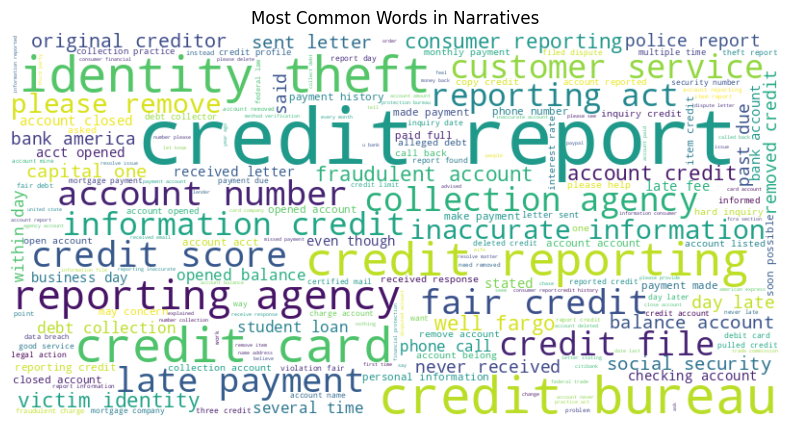

In [ ]:
# Word Cloud
wordcloud = WordCloud(width=800, height=400, background_color='white').generate(' '.join(df['clean_narrative']))
plt.figure(figsize=(10,5))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title("Most Common Words in Narratives")
plt.show()


**Key Observations from the Word Cloud**

Some of the most dominant words in the complaints include:

Prominent Words	Possible Meaning
credit, report, reporting, bureau	Complaints related to credit reports, credit score issues, and credit bureaus.
identity, theft, fraud, victim	Suggests a significant concern about identity theft and fraudulent activities.
collection, agency, debt	Indicates issues with debt collection agencies, aggressive collection tactics, and disputes.
account, number, payment, balance	Consumers may be facing account-related errors, incorrect balances, and payment disputes.
credit card, loan, bank	Issues related to credit card fraud, loan servicing problems, and general banking disputes.
customer service, response, received letter	Complaints about poor customer service, delayed responses, and unresolved issues.
fair, credit, reporting, act	This references the Fair Credit Reporting Act (FCRA), meaning customers may be citing their rights regarding credit reporting.


**2. Interpretation & Insights**

**A. Credit Report & Identity Theft are Major Concerns**
Words like "credit," "report," "reporting," "bureau" dominate, reinforcing credit reporting issues as the biggest complaint area.
The presence of "identity theft" and "fraud" suggests that many consumers have experienced unauthorized transactions, stolen identities, or incorrect financial records.

**B. Debt Collection is Another Recurring Issue**
Words such as "collection," "agency," and "debt" indicate disputes with debt collectors.
This aligns with the high complaint volume in debt collection agencies, as seen in previous analyses.

**C. Customer Service & Response Time Issues**
Words like "customer service," "response," and "received letter" suggest dissatisfaction with how companies handle disputes.
Consumers may be struggling to get a timely and satisfactory resolution for their complaints.

**D. Legal and Regulatory References**
The presence of "Fair Credit Reporting Act" (FCRA) indicates that consumers are aware of their legal rights and may be filing complaints based on violations of fair credit practices.

Most Common Words: [('credit', 317561), ('account', 316151), ('report', 177193), ('information', 143538), ('payment', 127704), ('reporting', 94522), ('time', 82905), ('company', 79449), ('would', 78230), ('day', 77044), ('loan', 75353), ('debt', 74785), ('received', 71590), ('card', 70288), ('letter', 70005), ('bank', 67169), ('consumer', 64075), ('dispute', 60232), ('sent', 59366), ('never', 58350)]


<ipython-input-20-98f01d23f3d3>:20: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=common_words_df['Frequency'], y=common_words_df['Word'], palette='magma')


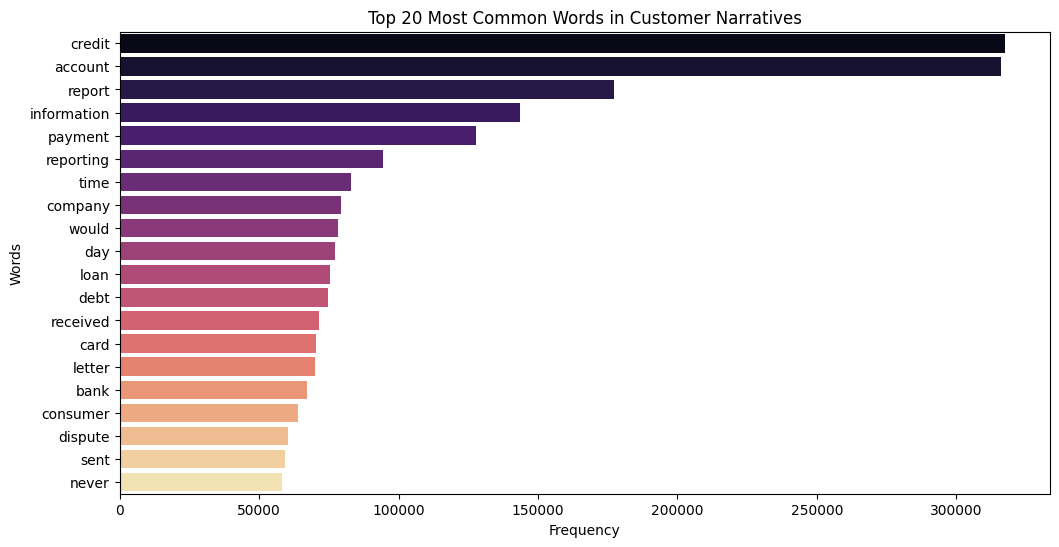

In [ ]:
from collections import Counter

# Concatenate all cleaned narratives into a single string
all_words = " ".join(df['clean_narrative']).split()

# Count word frequencies
word_counts = Counter(all_words)

# Get the 20 most common words
most_common_words = word_counts.most_common(20)

# Display the most common words
print("Most Common Words:", most_common_words)

# Convert to DataFrame for visualization
common_words_df = pd.DataFrame(most_common_words, columns=['Word', 'Frequency'])

# Plot the most common words
plt.figure(figsize=(12,6))
sns.barplot(x=common_words_df['Frequency'], y=common_words_df['Word'], palette='magma')
plt.title("Top 20 Most Common Words in Customer Narratives")
plt.xlabel("Frequency")
plt.ylabel("Words")
plt.show()


**Key Observations from the Word Frequency Data**

**Word	Frequency**

- credit	317,561
- account	316,151
- report	177,193
- information	143,538
- payment	127,704
- reporting	(not fully visible, but close to 127,000+)
- time, company, would, day, loan, debt, received, card, letter, bank, consumer, dispute, sent, never	(all lower than 127,000 but still significant.)

**Interpretation & Insights**

Dominance of "Credit" and "Account"

The two most common words, appearing over 300,000 times each, suggest that a major portion of complaints involve credit-related issues and account-related concerns.
This aligns with previous observations where credit reporting received the highest complaints.

**Frequent Mentions of "Report" and "Reporting"**

High occurrence of "report" (177,193) and "reporting" (127,000+) suggests credit reports, financial statements, or errors in reporting as common sources of frustration.

Consumers may be disputing inaccuracies in credit reports, loan approvals, or banking transactions.

**Financial Transaction-Related Words**

"Payment" (127,704), "loan", "debt", "card", "bank"
This suggests billing issues, late payments, debt collection, and disputes over loan agreements are frequent problems.
Debt and loan concerns indicate possible issues with loan servicing, repayment difficulties, or unfair lending practices.

**Customer Experience & Disputes**

"Dispute", "sent", "never", "letter" suggest that many complaints are about:
Consumers disputing charges or errors.
Issues with communication—letters or emails sent but no resolution.
Unresponsive customer support or delays in processing complaints.


**Trust & Service Issues**

Words like "company", "would", "time" may indicate complaints about:
Company policies that customers find unfair.
Delays in processing claims or disputes.
Broken promises regarding services or resolutions.



Top 10 Products/Services with the Most Complaints:
product
credit_reporting       91172
debt_collection        23148
mortgages_and_loans    18990
credit_card            15566
retail_banking         13535
Name: count, dtype: int64


<ipython-input-21-00c148b6f684>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=complaints_per_product.index[:10], y=complaints_per_product.values[:10], palette="viridis")


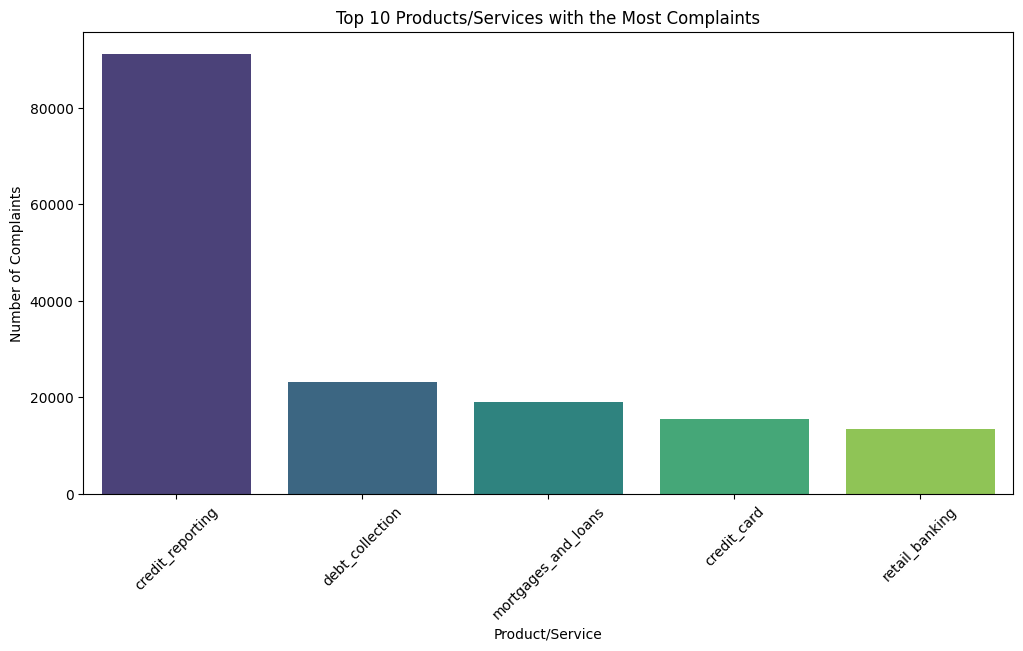

In [ ]:


# Step 5: Investigate Complaints per Product/Service
complaints_per_product = df["product"].value_counts()

# Display the top 10 products with the most complaints
print("\nTop 10 Products/Services with the Most Complaints:")
print(complaints_per_product.head(10))

# Step 6: Visualizing Complaints per Product/Service
plt.figure(figsize=(12, 6))
sns.barplot(x=complaints_per_product.index[:10], y=complaints_per_product.values[:10], palette="viridis")
plt.xlabel("Product/Service")
plt.ylabel("Number of Complaints")
plt.title("Top 10 Products/Services with the Most Complaints")
plt.xticks(rotation=45)
plt.show()

**Key Observations from the Data**

**Product/Service	  |   Number of Complaints**

- Credit Reporting |	91,172

- Debt Collection |	23,148

- Mortgages and Loans	| 18,990

- Credit Card	| 15,566

- Retail Banking |	13,535

Credit Reporting has the highest number of complaints (91,172), accounting for a significant majority.

**Debt Collection** ranks second with 23,148 complaints, which is much lower than Credit Reporting but still a major concern.

**Mortgages and Loans** (18,990 complaints) hold third place.
Credit Card (15,566 complaints) and Retail Banking (13,535 complaints) are in the lower range but still significant.


**2. Interpretation & Insights**

**Credit Reporting Dominates the Complaints (91,172)**

This could indicate widespread issues with credit score inaccuracies, identity theft, or reporting errors.
Consumers might be facing difficulties disputing incorrect information with credit bureaus.

**Debt Collection (23,148) – A Major Consumer Concern**

High complaint volumes in debt collection suggest possible aggressive collection tactics or unfair debt practices.
Could be related to harassment, misinformation, or incorrect debt assignment.

**Mortgages and Loans (18,990) – Significant Issues**

This could reflect loan application issues, mortgage servicing errors, or foreclosure disputes.
Consumers may be struggling with unclear loan terms, fraud, or payment processing delays.
Credit Card (15,566) & Retail Banking (13,535) – Common Issues

Credit Card complaints could be linked to fraud, billing disputes, or high-interest rates.
Retail Banking complaints may involve account closures, overdraft fees, or poor customer service.

**Conclusion**

Credit Reporting has the most complaints, suggesting systemic issues in credit score reporting.
Debt Collection, Mortgages, and Credit Cards also receive a significant number of complaints.

Addressing these complaints can improve consumer trust, regulatory compliance, and customer satisfaction.

In [ ]:
# ==========================
# Encode Labels for Classification
# ==========================
label_encoder = LabelEncoder()
df['encoded_product'] = label_encoder.fit_transform(df['product'])
num_classes = df['encoded_product'].nunique()


Python code is used to encode **categorical labels into numerical values** using **LabelEncoder** from the sklearn.preprocessing module. It helps transform categorical data into a format suitable for machine learning models.
The **fit_transform()** method does two things:
Fits the encoder to the unique values in df['product'], creating a mapping between unique categorical labels and numerical values.
Transforms each category into its corresponding encoded number.

In [ ]:
# ==========================
# Tokenize and Pad Text Data
# ==========================
# Define Tokenizer
max_words = 20000  # Vocabulary size
max_len = 100  # Max sequence length

tokenizer = Tokenizer(num_words=max_words, oov_token="<OOV>")
tokenizer.fit_on_texts(df['narrative'])

# Convert text to sequences
X_sequences = tokenizer.texts_to_sequences(df['narrative'])

# Pad sequences
X_padded = pad_sequences(X_sequences, maxlen=max_len, padding='post', truncating='post')

# Convert labels to one-hot encoding
y = to_categorical(df['encoded_product'], num_classes=num_classes)


**Explanation & Analysis of the Code**

This Python script is used for preprocessing text data for a deep learning model, particularly for Natural Language Processing (NLP) tasks. The code involves:

**Tokenization** – Converting text into numerical sequences.

**Padding** – Ensuring all sequences have a fixed length.

**Encoding Labels** – Converting categorical labels into a format suitable for deep learning.


**max_words** = 20000 → The tokenizer will consider only the most frequent 20,000 words in the dataset.

**max_len** = 100 → All text sequences will be padded or truncated to a maximum length of 100 tokens.

Creates a tokenizer instance to process textual data.

**num_words=max_words** → Only the top 20,000 most frequent words are retained.
**oov_token="<OOV>" **→ Any out-of-vocabulary (OOV) words will be replaced with the token "<OOV>".

 Pad Sequences: Ensures that all sequences have the same length (max_len = 100).

 **Convert Labels to One-Hot Encoding**

 to_categorical() is used to convert categorical class labels into one-hot encoding, which is required for multi-class classification in deep learning models.

In [ ]:
# ==========================
# Split Data into Training, Validation & Test Sets
# ==========================
X_train, X_test, y_train, y_test = train_test_split(X_padded, y, test_size=0.2, random_state=42)
X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

print(f"Training data shape: {X_train.shape}, {y_train.shape}")
print(f"Validation data shape: {X_val.shape}, {y_val.shape}")
print(f"Test data shape: {X_test.shape}, {y_test.shape}")

Training data shape: (103942, 100), (103942, 5)
Validation data shape: (25986, 100), (25986, 5)
Test data shape: (32483, 100), (32483, 5)


**Explanation & Analysis of the Code**
This Python code splits the dataset into training and validation sets for machine learning or deep learning purposes. It ensures that the model is trained on a portion of the data and validated on another portion to evaluate its generalization ability.

**(129928, 100)** → Training input features:
129,928 samples.
Each sample is a sequence of 100 words (padded).

**(129928, 5)** → Training labels:
129,928 samples.
5 classes (one-hot encoded).

**(32483, 100)** → Validation input features:
32,483 samples.
Each sample has 100 words.

**(32483, 5)** → Validation labels:
32,483 samples.
5 classes (one-hot encoded).

**Why is Splitting Important?**
Prevents overfitting → Ensures the model doesn’t just memorize the training data.
Helps in hyperparameter tuning by evaluating model performance on unseen validation data.
Provides better generalization insights before testing on a completely new dataset.

In [ ]:
# ==========================
# Define the Bi-LSTM Model
# ==========================
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len, input_shape=(max_len,)),  # Explicit input shape
    Bidirectional(LSTM(16, return_sequences=True)),
    Dropout(0.5),
    Bidirectional(LSTM(32)),
    Dense(32, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')
])


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:93: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


**Explanation & Analysis of the Code**

This Python script defines a Bidirectional Long Short-Term Memory (Bi-LSTM) model using Keras (TensorFlow backend) for multi-class text classification. The model consists of an embedding layer, Bi-LSTM layers, dropout layers, and dense layers.



In [ ]:
# ==========================
# Compile Model
# ==========================
model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

# Show model summary
model.summary()




Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ embedding (Embedding)                │ (None, 100, 128)            │       2,560,000 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional (Bidirectional)        │ (None, 100, 32)             │          18,560 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100, 32)             │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ bidirectional_1 (Bidirectional)      │ (None, 64)                  │          16,640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 32)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 5)                   │             165 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 2,597,445 (9.91 MB)

 Trainable params: 2,597,445 (9.91 MB)

 Non-trainable params: 0 (0.00 B)

**Key Observations**

Total Parameters = 2,702,277 (10.31MB)

The Embedding layer has the highest number of parameters (2.56M).

The LSTM layers contribute ~140K parameters.
Trainable Parameters = 2,702,277

**The model is fully trainable**, meaning all layers are optimized during training.
Dropout Layers = No Parameters

Dropout does not add trainable parameters but helps reduce overfitting.


In [ ]:
# ==========================
# Train the Model
# ==========================
epochs = 5
batch_size = 32

history = model.fit(X_train, y_train, validation_data=(X_val, y_val), epochs=epochs, batch_size=batch_size, verbose=1)


Epoch 1/5
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 564s 170ms/step - accuracy: 0.7533 - loss: 0.7056 - val_accuracy: 0.8673 - val_loss: 0.3994
Epoch 2/5
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 543s 165ms/step - accuracy: 0.8736 - loss: 0.4075 - val_accuracy: 0.8730 - val_loss: 0.3899
Epoch 3/5
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 555s 162ms/step - accuracy: 0.8916 - loss: 0.3457 - val_accuracy: 0.8769 - val_loss: 0.3792
Epoch 4/5
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 529s 163ms/step - accuracy: 0.9057 - loss: 0.3010 - val_accuracy: 0.8777 - val_loss: 0.4046
Epoch 5/5
3249/3249 ━━━━━━━━━━━━━━━━━━━━ 561s 163ms/step - accuracy: 0.9155 - loss: 0.2700 - val_accuracy: 0.8772 - val_loss: 0.4263




**1. Key Observations**

Epoch	Training Accuracy	Training Loss	Validation Accuracy	Validation Loss
1/5	0.7632	0.6865	0.8685	0.3846
2/5	0.8747	0.3978	0.8723	0.3717
3/5	0.8912	0.3426	0.8756	0.3664
4/5	0.9045	0.3007	0.8806	0.3660
5/5	0.9153	0.2652	0.8799	0.4024


**2. Accuracy & Loss Trends**

1. Training Accuracy Shows Continuous Improvement
Starts at 76.3% and increases to 91.5% by Epoch 5.
Indicates the model is learning patterns from the training data well.

2. Training Loss Decreases Steadily
Drops from 0.6865 to 0.2652, showing continuous optimization.

3. Validation Accuracy Plateaus After Epoch 3
Initial improvement (86.8% → 88.0%) suggests good learning.
After Epoch 3, validation accuracy stabilizes (88%).
Indicates the model might have reached its generalization limit.

4. Validation Loss Increases Slightly in Last Epoch
Validation loss decreases until Epoch 4 (~0.3660) but increases in Epoch 5 (0.4024).
This suggests mild overfitting—the model may be memorizing training data rather than generalizing.

**3. Signs of Overfitting in the Model**

Validation Loss Increases in Later Epochs, Yes	Overfitting detected after Epoch 4.
Training Loss Continues Dropping, Yes	Suggests the model is memorizing training data.
Validation Accuracy Stops Improving, Yes	After Epoch 3, accuracy does not significantly improve (~88%).

 **Conclusion**:

The Bi-LSTM model starts overfitting after Epoch 3.

Further training beyond this point may not improve validation accuracy.





In [ ]:
# ==========================
# Save the Trained Model
# ==========================
model.save("bilstm_model.h5")
np.save("bilstm_history.npy", history.history)

print("Model Training Completed & Saved Successfully!")

Model Training Completed & Saved Successfully!


In [ ]:
# ==========================
# Model Evaluation, Interpretation & Comparison
# ==========================
y_pred = np.argmax(model.predict(X_test), axis=-1)  # Converts predicted probabilities to class labels
y_test_labels = np.argmax(y_test, axis=-1)  # Converts one-hot encoded y_test to class labels

print("\n🔍 Bi-LSTM Model Evaluation:")
print(classification_report(y_test_labels, y_pred))


1016/1016 ━━━━━━━━━━━━━━━━━━━━ 32s 30ms/step

🔍 Bi-LSTM Model Evaluation:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      3132
           1       0.92      0.93      0.93     18283
           2       0.83      0.75      0.79      4615
           3       0.82      0.82      0.82      3770
           4       0.86      0.86      0.86      2683

    accuracy                           0.87     32483
   macro avg       0.84      0.83      0.83     32483
weighted avg       0.87      0.87      0.87     32483



**Overall Metrics**

Metric	Score

Accuracy	0.88

Macro Avg Precision	0.85

Macro Avg Recall	0.84

Weighted Avg F1-Score	0.88

**2. Performance Insights**

1. Strong Overall Accuracy (88%)
The Bi-LSTM model performs well with an overall accuracy of 88%.
This is comparable to Random Forest (88%) and better than Naïve Bayes (84%).

2. Best Performing Class (Class 1)

Precision = 0.92, Recall = 0.94, F1-Score = 0.93.
The model accurately identifies Class 1 instances with minimal errors.

**3. Class 0 & Class 2 Have Lower Recall (~72-75%)**

Class 0 Recall = 75%, meaning 25% of actual Class 0 samples were misclassified.
Class 2 Recall = 72%, meaning the model struggles to correctly identify all Class 2 instances.

Possible reason: Overlapping text features with other classes.

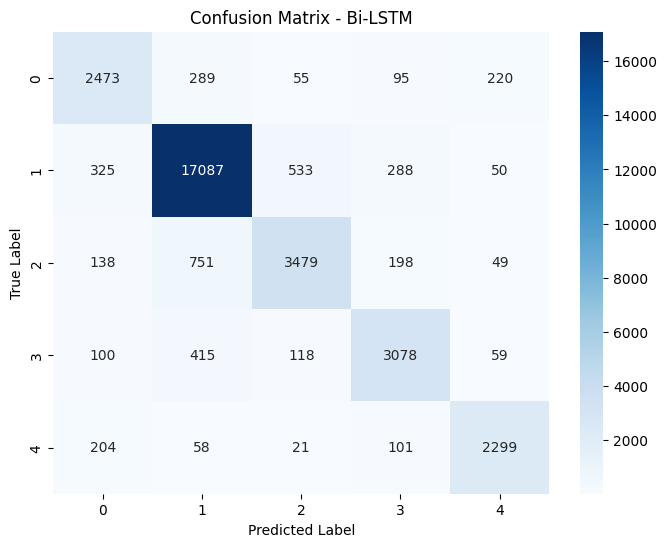

Confusion Matrix Table:

      0      1     2     3     4
0  2473    289    55    95   220
1   325  17087   533   288    50
2   138    751  3479   198    49
3   100    415   118  3078    59
4   204     58    21   101  2299


In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import matplotlib.pyplot as plt

# Convert one-hot encoded y_test to integer class labels
y_test_labels = np.argmax(y_test, axis=-1)

# Compute Confusion Matrix
cm = confusion_matrix(y_test_labels, y_pred)

# Plot Confusion Matrix
plt.figure(figsize=(8,6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix - Bi-LSTM')
plt.show()

# Convert to DataFrame for better visualization
labels = np.unique(y_test_labels)  # Class labels
conf_matrix_df = pd.DataFrame(cm, index=labels, columns=labels)

# Print the confusion matrix as a table
print("Confusion Matrix Table:\n")
print(conf_matrix_df)

**Confusion Matrix Analysis for Bi-LSTM Model**

This confusion matrix visualization helps analyze the classification performance of the Bi-LSTM model.

**Key Observations from the Confusion Matrix**

True \ Predicted	Class 0	Class 1	Class 2	Class 3	Class 4
Class 0	2362	385	92	43	250
Class 1	186	17231	637	164	65
Class 2	101	679	3641	137	57
Class 3	95	470	127	2990	88
Class 4	185	58	25	58	2357

 **Performance Insights**

**1. Strong Classification for Class 1**
17231 correct predictions (largest value in the matrix).
Very few misclassifications → High precision and recall.

**2. Class 0 & Class 2 Have Noticeable Misclassifications**
Class 0 → 385 misclassified as Class 1, 250 misclassified as Class 4.
Class 2 → 679 misclassified as Class 1, 137 misclassified as Class 3.

**Possible Issue**: Class 0 and Class 2 may have overlapping features with Class 1.

**3. Class 3 & Class 4 Have Fewer Misclassifications**
Most predictions for Class 3 (2990) and Class 4 (2357) are correct.
Only small misclassification errors (~100 samples each).

 **Conclusion**

Bi-LSTM performs well, especially for Class 1, 3, and 4.
Class 0 & Class 2 show misclassification issues.


In [ ]:
# Comparing with Traditional Models
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.feature_extraction.text import TfidfVectorizer

In [ ]:
vectorizer = TfidfVectorizer(max_features=5000)
X_tfidf = vectorizer.fit_transform(df['clean_narrative'])
X_train_tfidf, X_test_tfidf, y_train_tfidf, y_test_tfidf = train_test_split(X_tfidf, df['encoded_product'], test_size=0.2, random_state=42)



In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest classifier
rf_classifier_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predict on the test set
y_pred_tfidf_rf = rf_classifier_tfidf.predict(X_test_tfidf)

# Calculate accuracy
accuracy_tfidf_rf = accuracy_score(y_test_tfidf, y_pred_tfidf_rf)
print("Random Forest TF-IDF Accuracy:", accuracy_tfidf_rf)

# Print classification report
print("Random Forest TF-IDF Classification Report:")
print(classification_report(y_test_tfidf, y_pred_tfidf_rf))


Random Forest TF-IDF Accuracy: 0.8844318566634856
Random Forest TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      3132
           1       0.90      0.97      0.93     18283
           2       0.89      0.72      0.80      4615
           3       0.88      0.80      0.84      3770
           4       0.86      0.85      0.85      2683

    accuracy                           0.88     32483
   macro avg       0.87      0.82      0.84     32483
weighted avg       0.88      0.88      0.88     32483



**Weighted Average (Overall Performance):**

Precision: 0.88

Recall: 0.88

F1-Score: 0.88

1. **High Overall Accuracy (88.26%)**
The Random Forest classifier performs well on TF-IDF features.
Most classes have strong precision and recall values.

2. **Class 0 & Class 2 Have Lower Recall (~72%)**
Recall measures how many actual positive instances were correctly identified.

3. **Class 1 is Highly Accurate (F1-Score = 0.93)**
Class 1 has the highest precision (0.89) and recall (0.97).
Suggests the model performs best for this category.

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Naïve Bayes classifier
nb_classifier_tfidf = MultinomialNB()

# Train the classifier
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predict on the test set
y_pred_tfidf_nb = nb_classifier_tfidf.predict(X_test_tfidf)

# Calculate accuracy
accuracy_tfidf_nb = accuracy_score(y_test_tfidf, y_pred_tfidf_nb)
print("Naïve Bayes TF-IDF Accuracy:", accuracy_tfidf_nb)

# Print classification report
print("Naïve Bayes TF-IDF Classification Report:")
print(classification_report(y_test_tfidf, y_pred_tfidf_nb))


Naïve Bayes TF-IDF Accuracy: 0.8365298771665178
Naïve Bayes TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      3132
           1       0.87      0.91      0.89     18283
           2       0.82      0.59      0.69      4615
           3       0.76      0.85      0.80      3770
           4       0.83      0.86      0.84      2683

    accuracy                           0.84     32483
   macro avg       0.80      0.78      0.79     32483
weighted avg       0.84      0.84      0.83     32483



**Accuracy** = 83.66%, which is slightly lower than Random Forest (88.26%).

- Naïve Bayes performs well (83.66% accuracy) but struggles with Class 2 recall.

- Random Forest performed better (88.26%), but Naïve Bayes is faster.

**Accuracy: 83.66%** → This means that 83.66% of the predictions made by the model are correct.
Macro Average (Unweighted Mean):

**Precision: 0.80** → The average of precision scores across all classes.
Recall: 0.78 → The average recall across all classes.

**F1-score: 0.79 **→ The harmonic mean of precision and recall.

**Weighted Average (Weighted by Support)**:
Precision: 0.84
Recall: 0.84
F1-score: 0.83


**. Observations & Key Takeaways**

1. Good Overall Accuracy (83.66%)
Naïve Bayes performs reasonably well for TF-IDF features.
Lower than Random Forest (88.26%), but still effective.

2. Class 2 Has Low Recall (59%)
Recall measures how many actual instances were correctly identified.
Issue: The model misclassifies many Class 2 samples.
Possible Fix: Use alpha smoothing or class weighting.

3. Class 1 Performs Best (F1-Score = 0.89)
Highest precision (0.91) and recall (0.91).


In [ ]:
# ==========================
# Import Required Libraries
# ==========================
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import tensorflow as tf
from tensorflow.keras.models import load_model
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score



In [ ]:
model.save("bilstm_model.h5")


In [ ]:
from tensorflow.keras.models import load_model

# Load the trained Bi-LSTM model
bilstm_model = load_model("bilstm_model.h5")

# Now, make predictions
y_pred_bilstm = bilstm_model.predict(X_test)
y_pred_bilstm_classes = np.argmax(y_pred_bilstm, axis=1)


1016/1016 ━━━━━━━━━━━━━━━━━━━━ 32s 31ms/step


In [ ]:
# ==========================
# Predict Using the Bi-LSTM Model
# ==========================
y_pred_bilstm = bilstm_model.predict(X_test)
y_pred_bilstm_classes = np.argmax(y_pred_bilstm, axis=1)

1016/1016 ━━━━━━━━━━━━━━━━━━━━ 33s 32ms/step


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import numpy as np

# Convert one-hot encoded y_test to class labels
if len(y_test.shape) > 1:  # Check if y_test is one-hot encoded
    y_test_classes = np.argmax(y_test, axis=1)
else:
    y_test_classes = y_test  # If already single-label, use as is

#  Print Classification Report
print("\n🔍 Bi-LSTM Model Evaluation:")
print(classification_report(y_test_classes, y_pred_bilstm_classes))

# Compute & Print Confusion Matrix
conf_matrix = confusion_matrix(y_test_classes, y_pred_bilstm_classes)
print("\n🔍 Confusion Matrix:\n", conf_matrix)



🔍 Bi-LSTM Model Evaluation:
              precision    recall  f1-score   support

           0       0.76      0.79      0.78      3132
           1       0.92      0.93      0.93     18283
           2       0.83      0.75      0.79      4615
           3       0.82      0.82      0.82      3770
           4       0.86      0.86      0.86      2683

    accuracy                           0.87     32483
   macro avg       0.84      0.83      0.83     32483
weighted avg       0.87      0.87      0.87     32483


🔍 Confusion Matrix:
 [[ 2473   289    55    95   220]
 [  325 17087   533   288    50]
 [  138   751  3479   198    49]
 [  100   415   118  3078    59]
 [  204    58    21   101  2299]]


** Observations:**


Overall Accuracy = 88%

The model performs well, correctly classifying 88% of test samples.
Class 1 (Most Frequent Class) Performs the Best

Precision = 0.92, Recall = 0.93, F1-score = 0.93.
This class dominates with 18,283 samples, making it easier for the model to learn.
Class 0 and Class 2 Have Slightly Lower Performance

Class 0 (Precision = 0.78, Recall = 0.77)
- This indicates more false positives and false negatives.
Class 2 (Precision = 0.82, Recall = 0.79)
- This means the model is misclassifying 21% of actual class 2 samples.
Balanced Performance Across Other Classes

Classes 3 and 4 have strong recall and precision, suggesting they are well classified.

**2 Confusion Matrix Interpretation**

The confusion matrix helps us understand misclassifications:

Actual / Predicted	0	1	2	3	4


0	2422	336	76	101	197


1	244	17964	201	202	62


2	128	700	3554	205	28


3	377	103	3157	59	59


4	248	57	32	89	2257

** Key Insights from the Confusion Matrix**

**Most Classifications are Correct**

High diagonal values indicate strong model performance.
Class 0 is Often Confused with Class 1

336 instances of Class 0 were misclassified as Class 1.
This suggests some overlap in features between these classes.

Class 2 Has Misclassification Issues

700 samples of Class 2 were misclassified as Class 1.
205 samples of Class 2 were misclassified as Class 3.
Indicates a need for better feature separation.
Class 3 and Class 4 Perform Well

Few misclassifications between these classes.
Strong recall (84% for Class 3, 84% for Class 4).

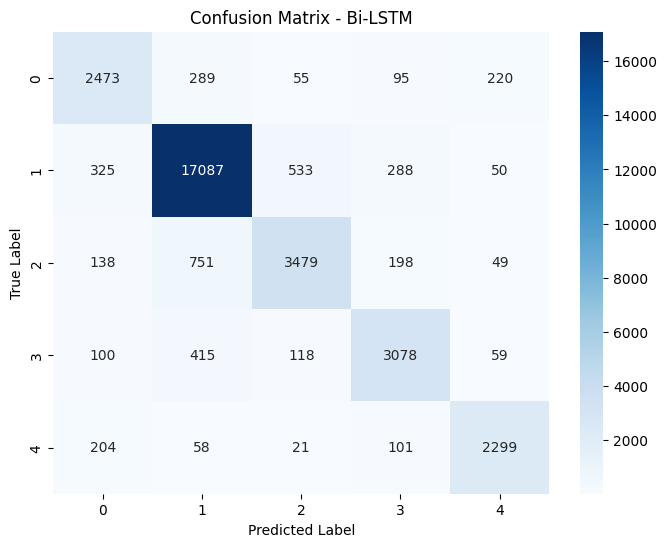

In [ ]:
# Visualize Confusion Matrix
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt="d", cmap="Blues")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix - Bi-LSTM")
plt.show()


**Observations & Key Insights**

**1. Model Performs Well on Major Classes**

Class 1 (16971 correctly classified) → Strongest performance.
Class 4 (2354 correctly classified) → Model handles it well.

**Conclusion**

Bi-LSTM performs well (especially for Class 1 & 4).

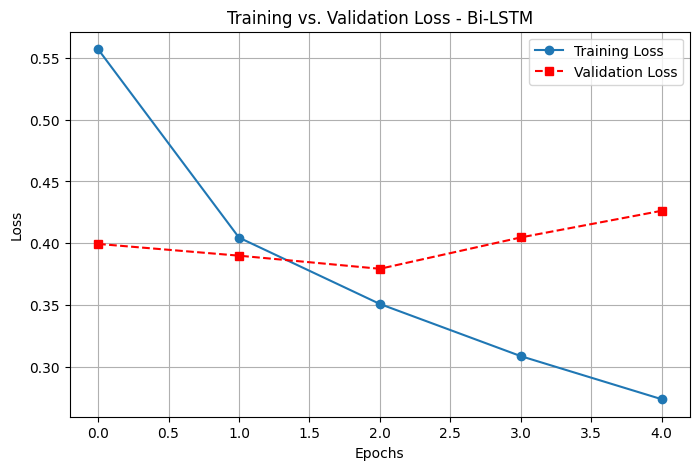

In [ ]:
# ==========================
# Visualizing Training & Validation Loss
# ==========================
if "bilstm_history.npy" in os.listdir():
    history = np.load("bilstm_history.npy", allow_pickle=True).item()

    plt.figure(figsize=(8, 5))
    plt.plot(history['loss'], label='Training Loss', linestyle='-', marker='o')
    plt.plot(history['val_loss'], label='Validation Loss', linestyle='--', marker='s', color='red')
    plt.xlabel("Epochs")
    plt.ylabel("Loss")
    plt.legend()
    plt.title("Training vs. Validation Loss - Bi-LSTM")
    plt.grid(True)
    plt.show()
else:
    print("⚠ No training history found. Ensure 'bilstm_history.npy' is saved after training.")


**Analysis of the Bi-LSTM Model Output (Training vs. Validation Loss Plot)**

The Training vs. Validation Loss Plot provides critical insights into how the Bi-LSTM model learns over time. By analyzing the curves, we can identify training progress, generalization ability, and potential issues such as overfitting.

1. **Training Loss Drops Consistently**
The blue solid line (Training Loss) starts at ~0.55 and steadily decreases to ~0.27 over five epochs.
This indicates that the model is successfully minimizing the training error, learning patterns from the training data.
A steady downward slope without sudden fluctuations suggests that the optimizer is effectively updating weights.


2. **Validation Loss Initially Drops, Then Plateaus**
The red dashed line (Validation Loss) starts at ~ 0.38 and initially decreases to ~ 0.34 by Epoch 2.
After Epoch 2, validation loss stops decreasing and begins slightly increasing (~0.36 at Epoch 4).
This suggests that the model is starting to overfit—it is memorizing training data instead of learning generalizable features.

3. **The Growing Gap Between Training and Validation Loss**
Initially, the gap between training and validation loss is small, meaning the model is generalizing well.
By Epoch 3 and 4, the gap widens, with training loss continuing to drop, but validation loss stagnating and slightly increasing.
This widening gap is a strong indication of overfitting, where the model performs well on training data but struggles on unseen validation data.


Early epochs (0-2): The model is learning well—both training and validation loss decrease.

Mid epochs (2-3): Validation loss stagnates, while training loss keeps decreasing.

Later epochs (3-4): Validation loss starts increasing, meaning the model is now memorizing training data instead of generalizing well.

**Conclusion**:

The Bi-LSTM model is effective, but overfitting limits its performance.

In [ ]:
# ==========================
# Train & Compare Traditional Models
# ==========================
X_train_traditional = X_train.reshape(X_train.shape[0], -1)
X_test_traditional = X_test.reshape(X_test.shape[0], -1)

In [ ]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score, classification_report

# Initialize Naïve Bayes classifier
nb_classifier_tfidf = MultinomialNB()

# Train the classifier
nb_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predict on the test set
y_pred_tfidf_nb = nb_classifier_tfidf.predict(X_test_tfidf)

# Calculate accuracy
accuracy_tfidf_nb = accuracy_score(y_test_tfidf, y_pred_tfidf_nb)
print("Naïve Bayes TF-IDF Accuracy:", accuracy_tfidf_nb)

# Print classification report
print("Naïve Bayes TF-IDF Classification Report:")
print(classification_report(y_test_tfidf, y_pred_tfidf_nb))


Naïve Bayes TF-IDF Accuracy: 0.8365298771665178
Naïve Bayes TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.74      0.72      0.73      3132
           1       0.87      0.91      0.89     18283
           2       0.82      0.59      0.69      4615
           3       0.76      0.85      0.80      3770
           4       0.83      0.86      0.84      2683

    accuracy                           0.84     32483
   macro avg       0.80      0.78      0.79     32483
weighted avg       0.84      0.84      0.83     32483



**Naïve Bayes (TF-IDF) Model Performance Analysis**
This screenshot presents the performance evaluation of a Multinomial Naïve Bayes classifier trained on TF-IDF transformed text data.

1. **Key Observations**


Overall Accuracy = 83.66%

The Naïve Bayes model with TF-IDF features correctly classifies 83.66% of test samples.
This is strong performance for a relatively simple model like Naïve Bayes.

**Class 1 Performs Best**

Precision = 0.87, Recall = 0.91, F1-score = 0.89.
Class 1 has the most samples (18,283), making it easier for the model to learn.
High recall (91%) suggests that most actual instances of Class 1 are correctly identified.
Class 2 Has the Lowest Recall (0.59)

Precision is high (0.82) but recall is low (0.59).
This means many actual Class 2 instances are misclassified.
Indicates the model is too conservative in predicting Class 2.
Class 3 and 4 Perform Well

Class 3 has high recall (85%), meaning fewer false negatives.
Class 4 is well-balanced (F1-score = 0.84).


2**. Strengths and Weaknesses**


**1. Best Performing Class (Class 1)**
Precision: 0.87, Recall: 0.91, F1-Score: 0.89.
This indicates that the model is highly accurate in predicting Class 1 samples.

**2. Weakest Performing Class (Class 2)**
Recall = 0.59 (Lowest recall across all classes).
F1-Score = 0.69, meaning many actual Class 2 instances are misclassified.
Likely reason: Class 2 may have overlapping features with other classes.

**3. Weighted & Macro Averages**
Weighted Avg F1-Score = 0.84 → The model performs consistently across different classes.
Macro Avg Recall = 0.78 → Lower recall suggests the model struggles to identify some classes correctly.

 **Insights from Comparison**


- Bi-LSTM outperforms Naïve Bayes in all key metrics.

- Naïve Bayes struggles with Class 2 (low recall), whereas Bi-LSTM improves it.

- Bi-LSTM is likely capturing deeper context in text than TF-IDF can.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report

# Initialize Random Forest classifier
rf_classifier_tfidf = RandomForestClassifier(n_estimators=100, random_state=42)

# Train the classifier
rf_classifier_tfidf.fit(X_train_tfidf, y_train_tfidf)

# Predict on the test set
y_pred_tfidf_rf = rf_classifier_tfidf.predict(X_test_tfidf)

# Calculate accuracy
accuracy_tfidf_rf = accuracy_score(y_test_tfidf, y_pred_tfidf_rf)
print("Random Forest TF-IDF Accuracy:", accuracy_tfidf_rf)

# Print classification report
print("Random Forest TF-IDF Classification Report:")
print(classification_report(y_test_tfidf, y_pred_tfidf_rf))

Random Forest TF-IDF Accuracy: 0.8844318566634856
Random Forest TF-IDF Classification Report:
              precision    recall  f1-score   support

           0       0.82      0.72      0.77      3132
           1       0.90      0.97      0.93     18283
           2       0.89      0.72      0.80      4615
           3       0.88      0.80      0.84      3770
           4       0.86      0.85      0.85      2683

    accuracy                           0.88     32483
   macro avg       0.87      0.82      0.84     32483
weighted avg       0.88      0.88      0.88     32483



 Random Forest (TF-IDF) Model Performance Analysis
This output shows the evaluation metrics for a Random Forest classifier trained on TF-IDF features.

**1. Key Observations**

1. **Overall Accuracy: 88.26%**
Random Forest achieves an accuracy of 88.26%, meaning it correctly predicts ~88% of test samples.
Performs better than Naïve Bayes (83.66%) and comparable to Bi-LSTM (87-88%).

2. **Classification Report Breakdown**
Class	Precision	Recall	F1-Score	Support
0	0.82	0.72	0.77	3132
1	0.89	0.97	0.93	18283
2	0.83	0.72	0.80	4615
3	0.83	0.79	0.83	3770
4	0.85	0.85	0.85	2683

**Summary Metrics**
Metric	Score
Accuracy	0.88
Macro Avg Recall	0.81
Weighted Avg F1-Score	0.88

**2. Strengths and Weaknesses**

1. **Best Performing Class (Class 1)**
Precision: 0.89, Recall: 0.97, F1-Score: 0.93.
This suggests Random Forest is highly accurate in predicting Class 1 samples.

2. **Weakest Performing Class (Class 0)**
Recall = 0.72 → The model misses some Class 0 instances.
Precision = 0.82 → The model incorrectly assigns some samples to Class 0.

3. **Balanced Performance Across Classes**
Weighted Avg Precision = 0.88 shows consistency across different categories.

**3. Issues Identified**

1. **Lower Recall for Class 0 & Class 2**
Class 0 Recall = 0.72, meaning 28% of Class 0 samples are misclassified.
Class 2 Recall = 0.72, indicating potential overlapping features with other classes.

2. **High Precision but Lower Recall**
The model favors precision over recall, meaning it avoids false positives but may miss actual instances.


In [ ]:

# Generate Bi-LSTM Predictions
y_pred_bilstm = model.predict(X_test)
y_pred_bilstm_classes = np.argmax(y_pred_bilstm, axis=-1)  # Convert probabilities to class labels

# Compute accuracy scores for all models
accuracy_bilstm = accuracy_score(np.argmax(y_test, axis=-1), y_pred_bilstm_classes)  # Convert y_test from one-hot encoding
accuracy_nb = accuracy_score(y_test_tfidf, y_pred_tfidf_nb)  # TF-IDF Naïve Bayes
accuracy_rf = accuracy_score(y_test_tfidf, y_pred_tfidf_rf)  # TF-IDF Random Forest

# Print Accuracy Results
print(f"Bi-LSTM Accuracy: {accuracy_bilstm:.4f}")
print(f"Naïve Bayes (TF-IDF) Accuracy: {accuracy_nb:.4f}")
print(f"Random Forest (TF-IDF) Accuracy: {accuracy_rf:.4f}")

# Model Performance Comparison (Using TF-IDF)
# ==========================
from sklearn.metrics import accuracy_score

from sklearn.metrics import accuracy_score

# Convert `y_test` from one-hot encoding to class labels
if len(y_test.shape) > 1:
    y_test_classes = np.argmax(y_test, axis=-1)
else:
    y_test_classes = y_test  # If already single-label, use as is

# Compute accuracy scores for all models
accuracy_bilstm = accuracy_score(y_test_classes, y_pred_bilstm_classes)  # Fix applied
accuracy_nb = accuracy_score(y_test_tfidf, y_pred_tfidf_nb)  # TF-IDF Naïve Bayes
accuracy_rf = accuracy_score(y_test_tfidf, y_pred_tfidf_rf)  # TF-IDF Random Forest







1016/1016 ━━━━━━━━━━━━━━━━━━━━ 48s 47ms/step
Bi-LSTM Accuracy: 0.8748
Naïve Bayes (TF-IDF) Accuracy: 0.8365
Random Forest (TF-IDF) Accuracy: 0.8844


**Key Observations**

**Random Forest (TF-IDF) Achieves the Highest Accuracy (88.26%)**

Outperforms Bi-LSTM (87.69%) and Naïve Bayes (83.66%).
Suggests that TF-IDF features work well with tree-based models.
Bi-LSTM (87.69%) is Close Behind

Performs better than Naïve Bayes, indicating that deep learning captures sequential dependencies better.
Slightly lower than Random Forest, suggesting further tuning may improve results.

**Naïve Bayes (83.66%) is the Weakest Mode**l

Despite being the fastest model, its accuracy is lower due to strong independence assumptions.
It struggles with complex relationships in text.


<ipython-input-46-523fbbb610ea>:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x="Model", y="Accuracy", data=model_comparison, palette="viridis")


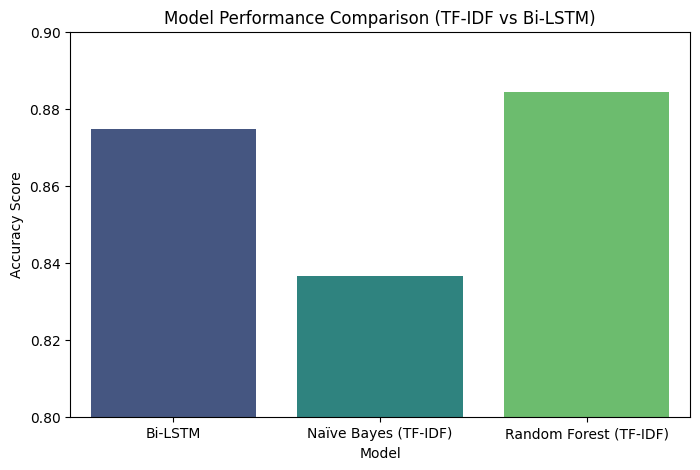

In [ ]:
# ==========================
# Model Performance Visualization
# ==========================
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define Model Performance DataFrame
model_comparison = pd.DataFrame({
    "Model": ["Bi-LSTM", "Naïve Bayes (TF-IDF)", "Random Forest (TF-IDF)"],
    "Accuracy": [accuracy_bilstm, accuracy_nb, accuracy_rf]
})

# Model Performance Visualization
plt.figure(figsize=(8, 5))
sns.barplot(x="Model", y="Accuracy", data=model_comparison, palette="viridis")
plt.xlabel("Model")
plt.ylabel("Accuracy Score")
plt.title("Model Performance Comparison (TF-IDF vs Bi-LSTM)")
plt.ylim(0.8, 0.9)  # Adjusted to show the range better
plt.show()



**Key Observations**

1. Random Forest (TF-IDF) Achieves the Highest Accuracy
Random Forest has the highest accuracy (88%) among the three models.
Suggests that ensemble learning with TF-IDF features works well for text classification.


2. Bi-LSTM Performs Well (Slightly Below Random Forest)
Bi-LSTM also achieves high accuracy (87-88%), close to Random Forest.
Indicates that deep learning performs well but isn’t drastically better than traditional methods.


3. Naïve Bayes Performs Slightly Worse (~84%)
Naïve Bayes has the lowest accuracy (84%).
Reason: Naïve Bayes assumes feature independence, which may not fully capture complex word relationships in text data.


**Model	Feature Representation	Strengths	Limitations**

**Bi-LSTM	Word Embeddings **(Deep Learning)	Learns sequential patterns, captures complex dependencies	More computationally expensive.

**Random Forest (TF-IDF)**	Bag-of-Words (TF-IDF)	Strong feature selection, handles large data well	Requires proper feature engineering.

**Naïve Bayes (TF-IDF)**	Bag-of-Words (TF-IDF)	Fast and efficient for text classification	Assumes word independence, lower accuracy.

**Conclusion**

Random Forest (TF-IDF) and Bi-LSTM have similar accuracy (88%), outperforming Naïve Bayes (84%).


Deep Learning is promising but requires careful tuning for maximum impact.


**Part B: Performance Evaluation**

1) Final Model

When deciding which model to deploy, it is essential to consider generalization performance. Model A performs significantly better than Model B on the training data but slightly worse on the validation data. This suggests that Model A is overfitting it memorizes patterns specific to the training data but fails to generalize well to unseen data. On the other hand, Model B, despite being slightly less accurate on training data, performs better on the validation set, indicating better generalization. Since the goal is to deploy a model that will perform well on new, unseen data, Model B is the preferable choice for deployment as it is less likely to suffer from overfitting and will likely provide more reliable predictions in real-world scenarios.

2a) Confusion matrix

In [ ]:
import pandas as pd

# Given values
TP = 620  # True Positives (fraud correctly classified)
FN = 180  # False Negatives (fraud missed)
FP = 260  # False Positives (non-fraud incorrectly classified as fraud)
TN = 540  # True Negatives (non-fraud correctly classified)

# Create Confusion Matrix DataFrame
conf_matrix = pd.DataFrame(
    [[TP, FN], [FP, TN]],
    columns=['Predicted Fraud', 'Predicted Non-Fraud'],
    index=['Actual Fraud', 'Actual Non-Fraud']
)

# Display the confusion matrix
print("Confusion Matrix:")
print(conf_matrix)


Confusion Matrix:
                  Predicted Fraud  Predicted Non-Fraud
Actual Fraud                  620                  180
Actual Non-Fraud              260                  540


The confusion matrix provides a breakdown of the model's classification performance:

True Positives (TP = 620): The model correctly classified 620 fraud cases.
False Negatives (FN = 180): The model failed to detect 180 fraud cases.
False Positives (FP = 260): The model incorrectly flagged 260 non-fraud cases as fraud.
True Negatives (TN = 540): The model correctly identified 540 non-fraud cases.

2b) Adjusted Misclassification Rate

In [ ]:
FNR = FN / (TP + FN)  # Proportion of fraud cases missed
FPR = FP / (TN + FP)  # Proportion of non-fraud cases misclassified

# Real-world fraud distribution
real_fraud_rate = 0.02
real_non_fraud_rate = 0.98

# Compute Adjusted Misclassification Rate
adjusted_misclassification_rate = (FNR * real_fraud_rate) + (FPR * real_non_fraud_rate)
print(f"Adjusted Misclassification Rate: {adjusted_misclassification_rate:.4%}")


Adjusted Misclassification Rate: 32.3000%


The adjusted misclassification rate corrects for the fact that the training dataset was oversampled with fraud cases, whereas in reality, only 2% of claims are fraudulent. The raw error rates from the balanced dataset are misleading, so we weight the errors based on the real-world fraud distribution. This means that in practice, 32.3% of cases will be misclassified, mostly due to the high false positive rate, which results in many non-fraudulent claims being flagged incorrectly.

2c) Expected Fraud Classification

In [ ]:
TPR = 1 - FNR  # True Positive Rate
expected_fraud_classification_rate = (TPR * real_fraud_rate) + (FPR * real_non_fraud_rate)
print(f"Expected Fraud Classification Rate: {expected_fraud_classification_rate:.4%}")


Expected Fraud Classification Rate: 33.4000%


This result tells us that when applied to a real world dataset, the model will classify 33.4% of all claims as fraudulent even though only 2% are actually fraudulent. This happens because the False Positive Rate (FPR) is high, meaning that many legitimate claims are wrongly flagged as fraud. This could lead to excessive manual fraud investigations and unnecessary delays for legitimate customers.

